In [5]:
from google.colab import files
uploaded = files.upload()


Saving Stock Prices Data Set.csv to Stock Prices Data Set.csv


In [6]:
import pandas as pd

df = pd.read_csv('Stock Prices Data Set.csv')
df.head()


,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


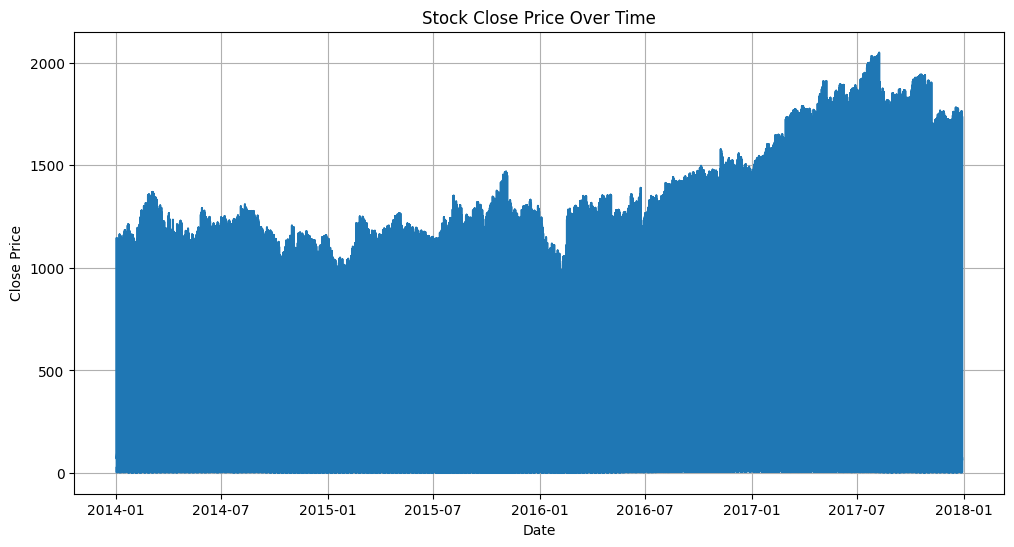

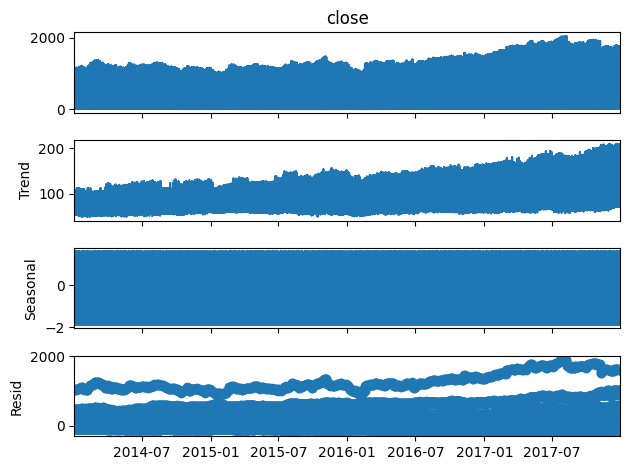

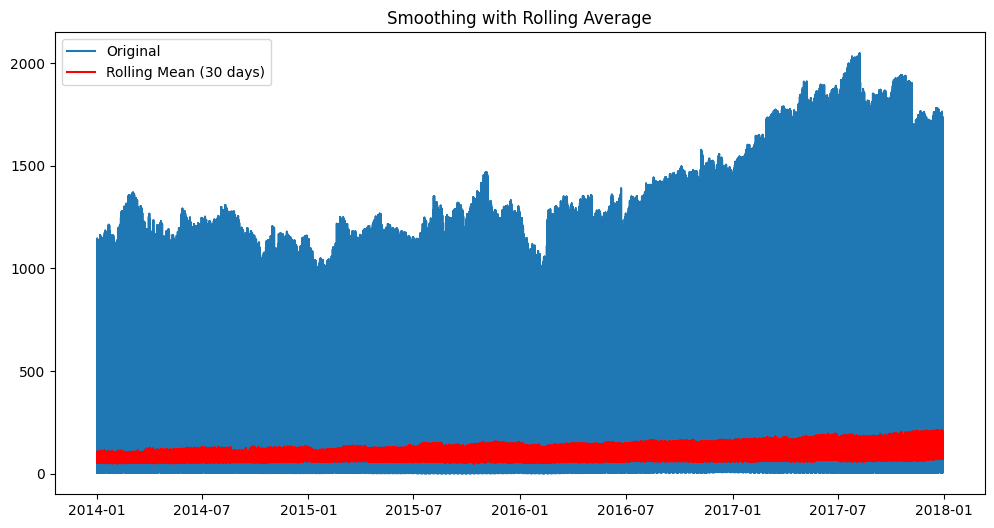

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

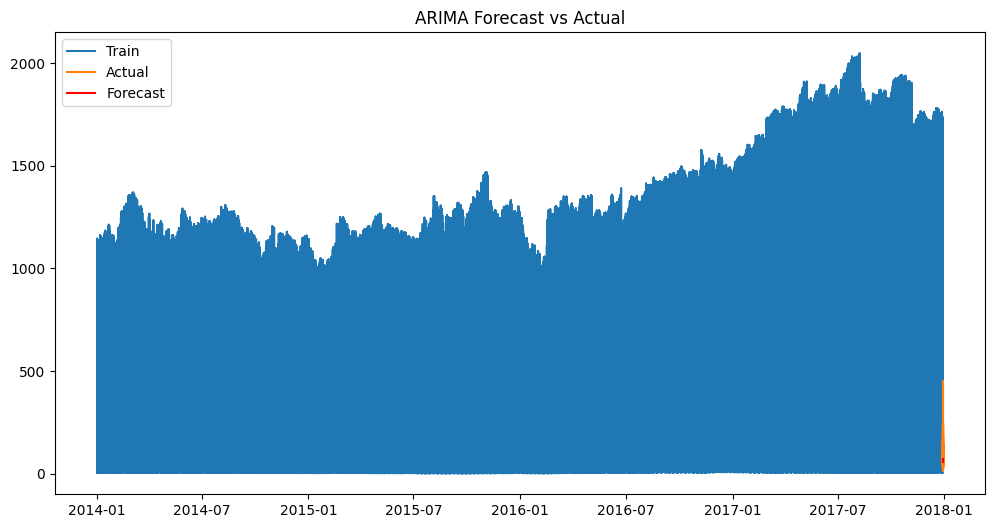

RMSE: 73.11915166712085


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

df = pd.read_csv('Stock Prices Data Set.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.set_index('date', inplace=True)

ts = df['close']

plt.figure(figsize=(12,6))
plt.plot(ts)
plt.title("Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

decomposition = seasonal_decompose(ts, model='additive', period=30)
decomposition.plot()
plt.tight_layout()
plt.show()

ts_rolling = ts.rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(ts, label='Original')
plt.plot(ts_rolling, label='Rolling Mean (30 days)', color='red')
plt.title("Smoothing with Rolling Average")
plt.legend()
plt.show()

train = ts[:-90]
test = ts[-90:]

model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=90)

plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)
